
# 21I-0383 Zaib Un Nisa
# Generative AI Assignment 1



# **Question #1 Implementing Rosenblatt’s Per-ceptron from Scratch**

Generating Synthetic Data

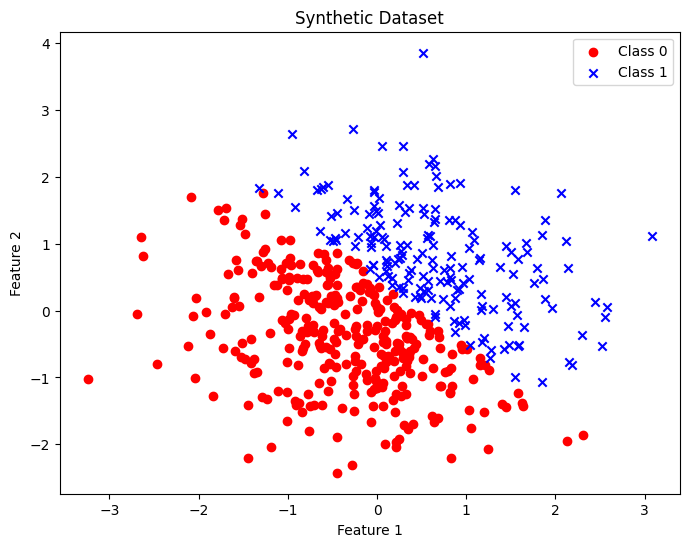

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set a seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 500

# Generate 500 samples with 2 features (using a normal distribution)
X = np.random.randn(num_samples, 2)

# Define a linear decision boundary: for example, x1 + x2 - 0.5 = 0
# Create binary labels (0 or 1) based on the decision boundary
y = (X[:, 0] + X[:, 1] - 0.5 > 0).astype(int)

# Visualize the dataset
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='Class 1')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Split the Data into Training and Testing Sets**
Using an 80/20 split for training and testing.


In [2]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Perceptron -> Step Activation Func**

In [3]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

**Training Func**

In [4]:
def train_perceptron(X, y, epochs=25, learning_rate=0.01):
    """
    Trains the perceptron model.
    
    Parameters:
      X            : Input features (numpy array)
      y            : True labels (numpy array)
      epochs       : Number of times to iterate over the training data
      learning_rate: Step size for weight updates
      
    Returns:
      weights, bias, errors : Learned weights, bias and list of misclassifications per epoch
    """
    num_features = X.shape[1]
    # Initialize weights and bias to zero
    weights = np.zeros(num_features)
    bias = 0.0
    errors = []  # To record the number of misclassifications in each epoch
    
    # Iterate over the dataset for a fixed number of epochs
    for epoch in range(epochs):
        epoch_errors = 0
        # Loop over each sample
        for xi, target in zip(X, y):
            # Compute the linear combination of inputs and weights
            linear_output = np.dot(xi, weights) + bias
            # Apply the step activation function
            y_pred = step_function(linear_output)
            # Calculate the update (only non-zero if misclassified)
            update = learning_rate * (target - y_pred)
            if update != 0:
                # Update weights and bias if there is a misclassification
                weights += update * xi
                bias += update
                epoch_errors += 1
        errors.append(epoch_errors)
        print(f"Epoch {epoch+1}/{epochs} - Misclassifications: {epoch_errors}")
    
    return weights, bias, errors

# Train the perceptron on the training data
weights, bias, errors = train_perceptron(X_train, y_train, epochs=25, learning_rate=0.01)


Epoch 1/25 - Misclassifications: 22
Epoch 2/25 - Misclassifications: 18
Epoch 3/25 - Misclassifications: 9
Epoch 4/25 - Misclassifications: 10
Epoch 5/25 - Misclassifications: 8
Epoch 6/25 - Misclassifications: 8
Epoch 7/25 - Misclassifications: 10
Epoch 8/25 - Misclassifications: 8
Epoch 9/25 - Misclassifications: 13
Epoch 10/25 - Misclassifications: 14
Epoch 11/25 - Misclassifications: 8
Epoch 12/25 - Misclassifications: 4
Epoch 13/25 - Misclassifications: 8
Epoch 14/25 - Misclassifications: 4
Epoch 15/25 - Misclassifications: 4
Epoch 16/25 - Misclassifications: 4
Epoch 17/25 - Misclassifications: 10
Epoch 18/25 - Misclassifications: 8
Epoch 19/25 - Misclassifications: 7
Epoch 20/25 - Misclassifications: 9
Epoch 21/25 - Misclassifications: 11
Epoch 22/25 - Misclassifications: 14
Epoch 23/25 - Misclassifications: 10
Epoch 24/25 - Misclassifications: 6
Epoch 25/25 - Misclassifications: 4


**Training Error per epoch plot**

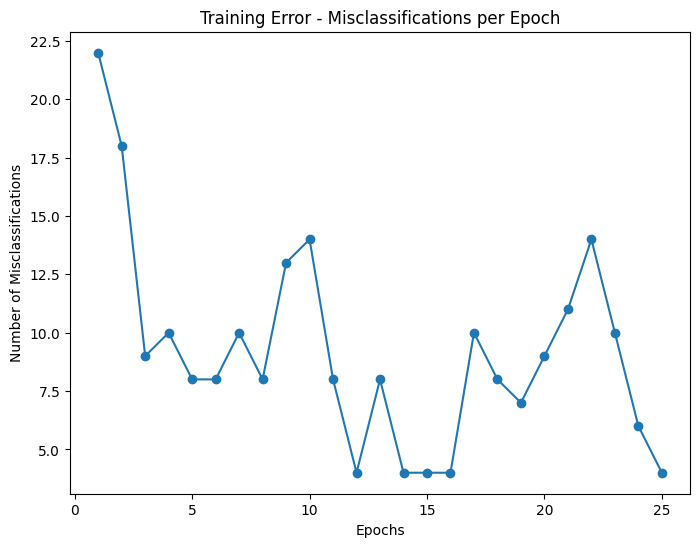

In [5]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(errors)+1), errors, marker='o')
plt.title("Training Error - Misclassifications per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.show()


**Plotting decision boundary**

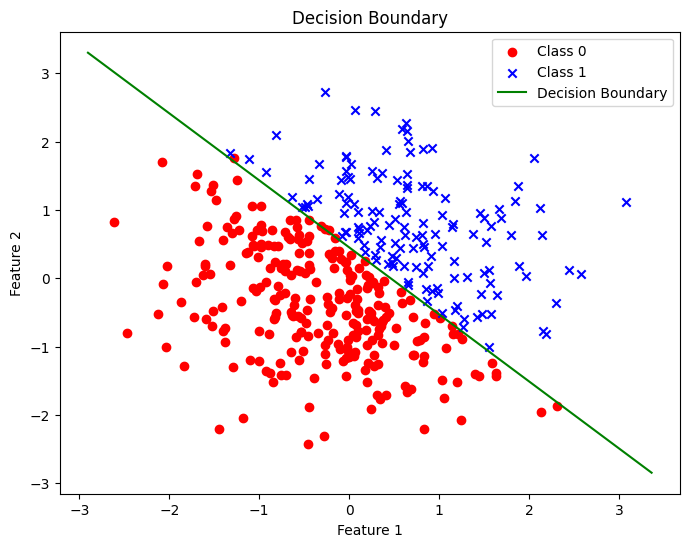

In [6]:
def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8,6))
    # Plot the data points
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='Class 1')
    
    # Get current plot limits to define boundary range
    x_min, x_max = plt.xlim()
    x_values = np.linspace(x_min, x_max, 200)
    
    # Avoid division by zero in case weight[1] is zero
    if weights[1] != 0:
        y_values = -(weights[0] * x_values + bias) / weights[1]
        plt.plot(x_values, y_values, color='green', label='Decision Boundary')
    else:
        # Vertical boundary line if weights[1] is zero
        x_line = -bias / weights[0]
        plt.axvline(x=x_line, color='green', label='Decision Boundary')
    
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot decision boundary on the training set
plot_decision_boundary(X_train, y_train, weights, bias)


**Test Data **

Test Accuracy: 99.00%


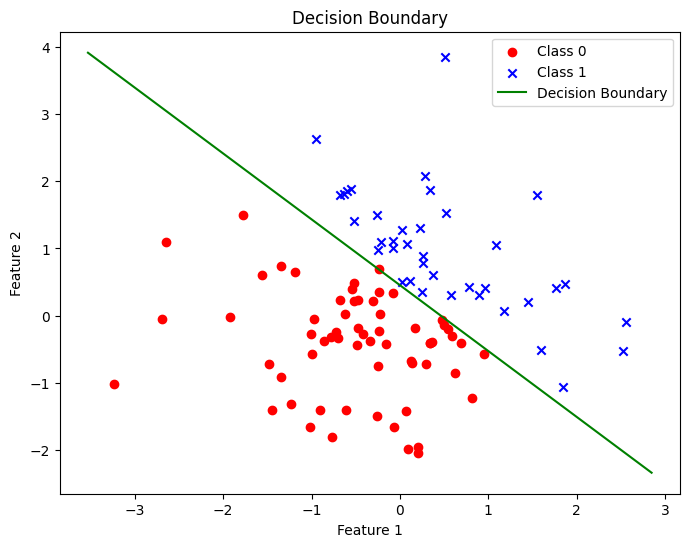

In [7]:
def predict(X, weights, bias):
    """
    Make predictions with the trained perceptron model.
    
    Parameters:
      X      : Input features (numpy array)
      weights: Trained weights (numpy array)
      bias   : Trained bias (float)
      
    Returns:
      Predictions (numpy array)
    """
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Generate predictions on the test set
y_pred_test = predict(X_test, weights, bias)

# Calculate accuracy on test set
accuracy = np.mean(y_pred_test == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary with test data
plot_decision_boundary(X_test, y_test, weights, bias)



# **Question #2 Implementing Convolution fromScratch**


Zaib's cat hehe (853, 1280, 3)


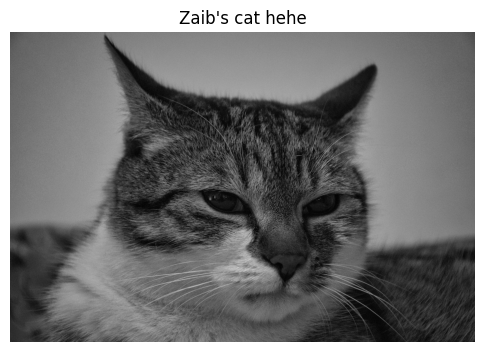

In [8]:
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread("/kaggle/input/grayscale-img/grayscale.jpg")
print("Zaib's cat hehe", image.shape)

# Since the image is already grayscale, no conversion is needed.
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Zaib's cat hehe")
plt.axis('off')
plt.show()



2D Convolution Function

In [9]:
# Check the shape of your image
print("Original image shape:", image.shape)

# If image has an extra dimension, squeeze it:
if image.ndim == 3:
    # If it has a single channel, remove that dimension:
    if image.shape[2] == 1:
        image = image.squeeze(axis=2)
    else:
        # If it has 3 channels (even though it looks grayscale), take one channel:
        image = image[..., 0]

print("Converted image shape:", image.shape)


Original image shape: (853, 1280, 3)
Converted image shape: (853, 1280)


In [10]:
def convolve2d_manual(image, kernel=None, stride=1, padding='valid', mode='convolution'):
    """
    Perform a manual 2D convolution or correlation on a grayscale image.
    
    Parameters:
      image   : 2D numpy array representing the grayscale image.
      kernel  : 2D numpy array for the kernel. If None, defaults to a 3x3 random kernel.
      stride  : The step size for moving the kernel over the image.
      padding : 'valid' for no padding, 'same' for zero-padding to maintain output size.
      mode    : 'convolution' (kernel is flipped) or 'correlation' (kernel is used as-is).
    
    Returns:
      output  : 2D numpy array resulting from the convolution/correlation.
    """
    # If no kernel is provided, generate a random 3x3 kernel
    if kernel is None:
        kernel = np.random.rand(3, 3)
    
    kernel_h, kernel_w = kernel.shape

    # For convolution, flip the kernel both vertically and horizontally.
    if mode == 'convolution':
        kernel = np.flipud(np.fliplr(kernel))
    
    # Apply padding if needed.
    if padding == 'same':
        pad_h = (kernel_h - 1) // 2
        pad_w = (kernel_w - 1) // 2
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    else:  # 'valid'
        padded_image = image

    # Determine the output dimensions.
    H, W = padded_image.shape
    out_height = ((H - kernel_h) // stride) + 1
    out_width  = ((W - kernel_w) // stride) + 1

    output = np.zeros((out_height, out_width))
    
    # Perform the convolution/correlation manually using nested loops.
    for i in range(out_height):
        for j in range(out_width):
            # Define the current region (patch) of the image.
            region = padded_image[i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w]
            # Element-wise multiply the region and kernel, then sum the result.
            output[i, j] = np.sum(region * kernel)
    
    return output


Applying three diff kernals: Edge detect, blurring, sharpening


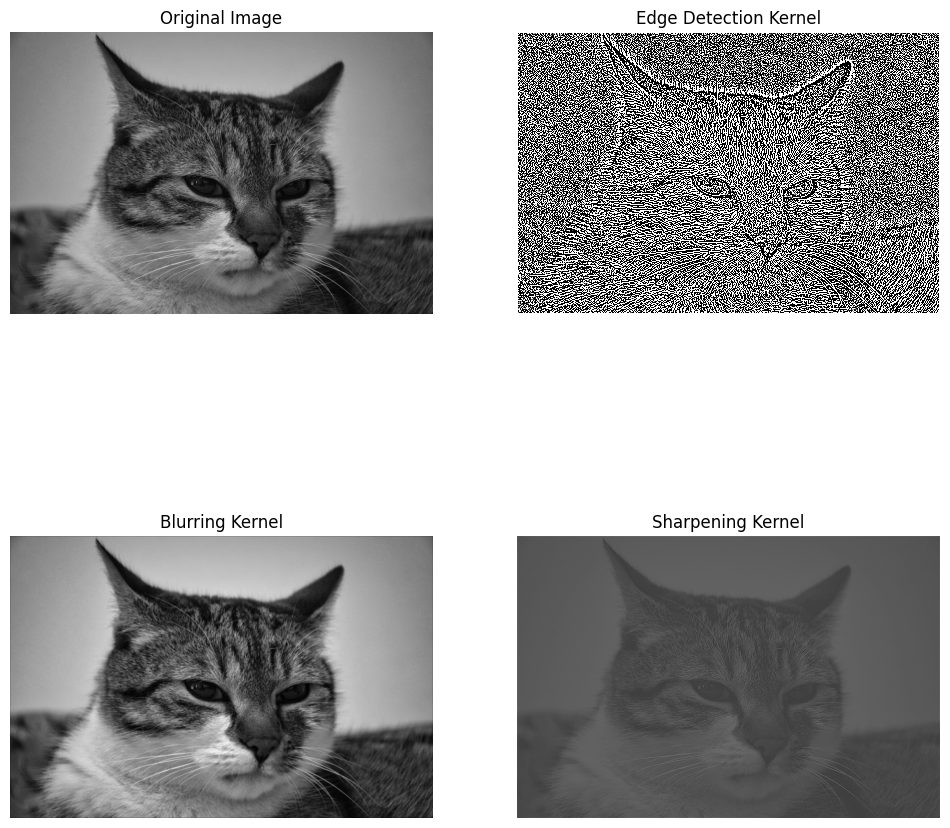

In [11]:
# Define specific kernels
kernel_edge = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

kernel_blur = np.ones((3, 3)) / 9.0

kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

# Apply our manual convolution function with 'same' padding so output size matches input
output_edge = convolve2d_manual(image, kernel_edge, stride=1, padding='same', mode='convolution')
output_blur = convolve2d_manual(image, kernel_blur, stride=1, padding='same', mode='convolution')
output_sharp = convolve2d_manual(image, kernel_sharp, stride=1, padding='same', mode='convolution')

# Normalize the edge output to [0, 1]
#output_edge = (output_edge - output_edge.min()) / (output_edge.max() - output_edge.min())

#output_edge = np.abs(output_edge)


# Plot the original and processed images side-by-side.
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')
axs[0, 1].imshow(output_edge, cmap='gray', vmin=0, vmax=1)
axs[0, 1].set_title("Edge Detection Kernel")
axs[0, 1].axis('off')
axs[1, 0].imshow(output_blur, cmap='gray')
axs[1, 0].set_title("Blurring Kernel")
axs[1, 0].axis('off')
axs[1, 1].imshow(output_sharp, cmap='gray')
axs[1, 1].set_title("Sharpening Kernel")
axs[1, 1].axis('off')
plt.show()


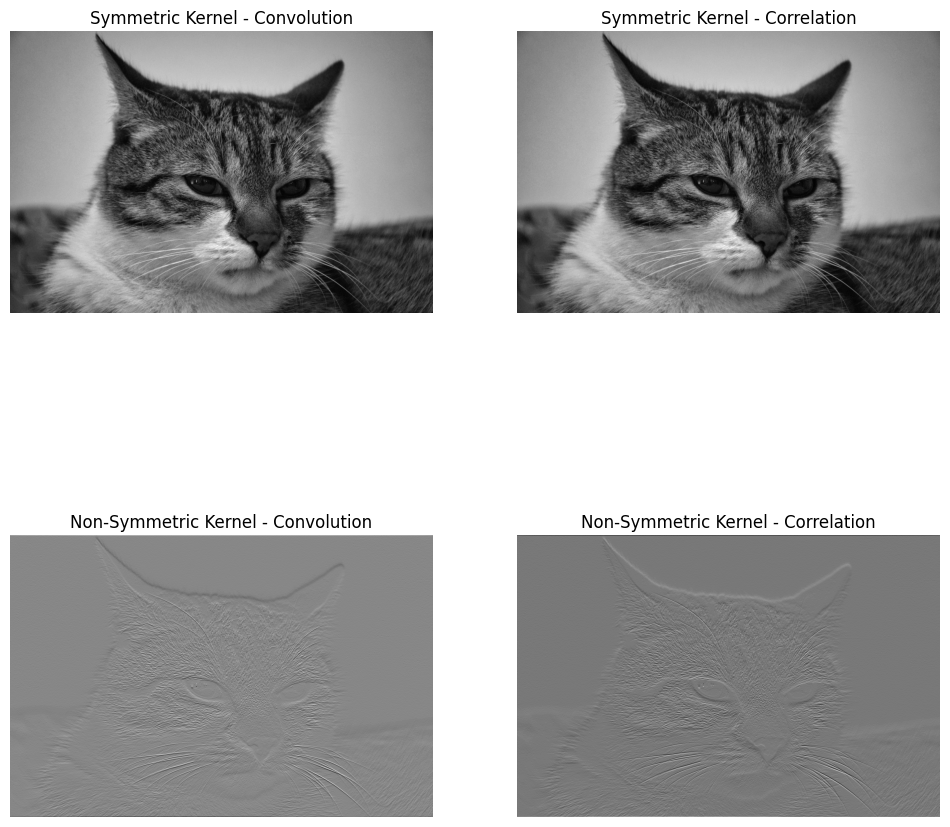

In [12]:
# Symmetric kernel (2x2 averaging kernel)
kernel_sym = np.array([[0.25, 0.25],
                       [0.25, 0.25]])

# Non-symmetric kernel
kernel_non_sym = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

# For symmetric kernel:
output_sym_conv = convolve2d_manual(image, kernel_sym, stride=1, padding='same', mode='convolution')
output_sym_corr = convolve2d_manual(image, kernel_sym, stride=1, padding='same', mode='correlation')

# For non-symmetric kernel:
output_non_sym_conv = convolve2d_manual(image, kernel_non_sym, stride=1, padding='same', mode='convolution')
output_non_sym_corr = convolve2d_manual(image, kernel_non_sym, stride=1, padding='same', mode='correlation')

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].imshow(output_sym_conv, cmap='gray')
axs[0, 0].set_title("Symmetric Kernel - Convolution")
axs[0, 0].axis('off')
axs[0, 1].imshow(output_sym_corr, cmap='gray')
axs[0, 1].set_title("Symmetric Kernel - Correlation")
axs[0, 1].axis('off')
axs[1, 0].imshow(output_non_sym_conv, cmap='gray')
axs[1, 0].set_title("Non-Symmetric Kernel - Convolution")
axs[1, 0].axis('off')
axs[1, 1].imshow(output_non_sym_corr, cmap='gray')
axs[1, 1].set_title("Non-Symmetric Kernel - Correlation")
axs[1, 1].axis('off')
plt.show()


Manually implemented convolution vs. NumPy-based convolu-
tion.

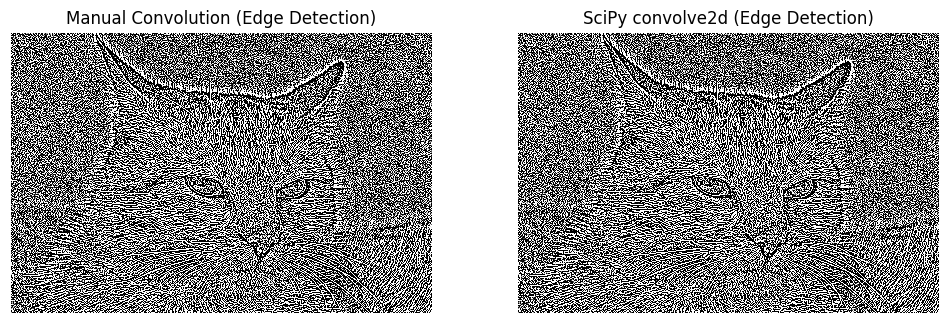

In [13]:
from scipy.signal import convolve2d

# Use the edge detection kernel as an example.
output_edge_scipy = convolve2d(image, kernel_edge, mode='same', boundary='fill', fillvalue=0)

# Plot the comparison between manual convolution and SciPy's implementation.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(output_edge, cmap='gray', vmin=0, vmax=1)
axs[0].set_title("Manual Convolution (Edge Detection)")
axs[0].axis('off')
axs[1].imshow(output_edge_scipy, cmap='gray', vmin=0, vmax=1)
axs[1].set_title("SciPy convolve2d (Edge Detection)")
axs[1].axis('off')
plt.show()


**Further experimenting
Using Different kernals**

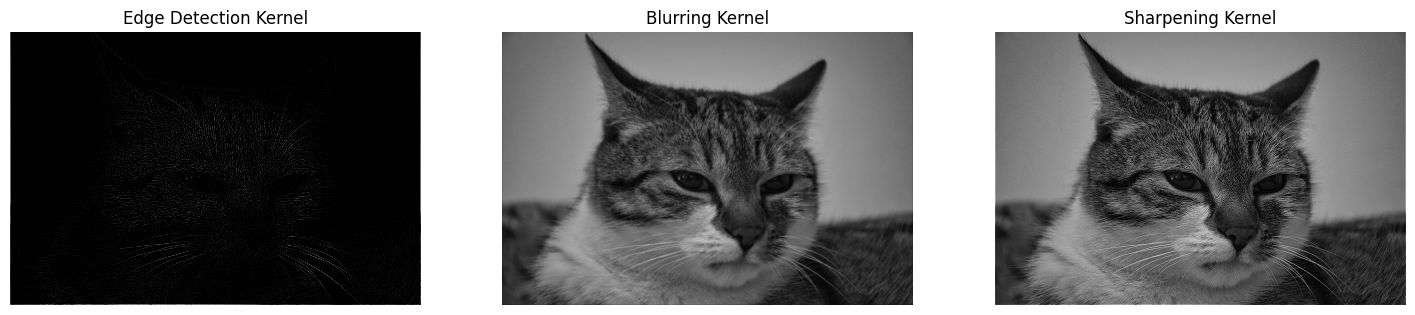

In [14]:
# Define different kernels
kernel_edge = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

kernel_blur = np.ones((3, 3)) / 9.0

kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

# Apply the kernels with 'same' padding
output_edge = convolve2d_manual(image, kernel_edge, stride=1, padding='same', mode='convolution')
output_blur = convolve2d_manual(image, kernel_blur, stride=1, padding='same', mode='convolution')
output_sharp = convolve2d_manual(image, kernel_sharp, stride=1, padding='same', mode='convolution')

# Visualize the results with adjusted contrast (vmin and vmax)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(output_edge, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Edge Detection Kernel")
axs[0].axis('off')
axs[1].imshow(output_blur, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Blurring Kernel")
axs[1].axis('off')
axs[2].imshow(output_sharp, cmap='gray', vmin=0, vmax=255)
axs[2].set_title("Sharpening Kernel")
axs[2].axis('off')
plt.show()



**Impact of kernal size**

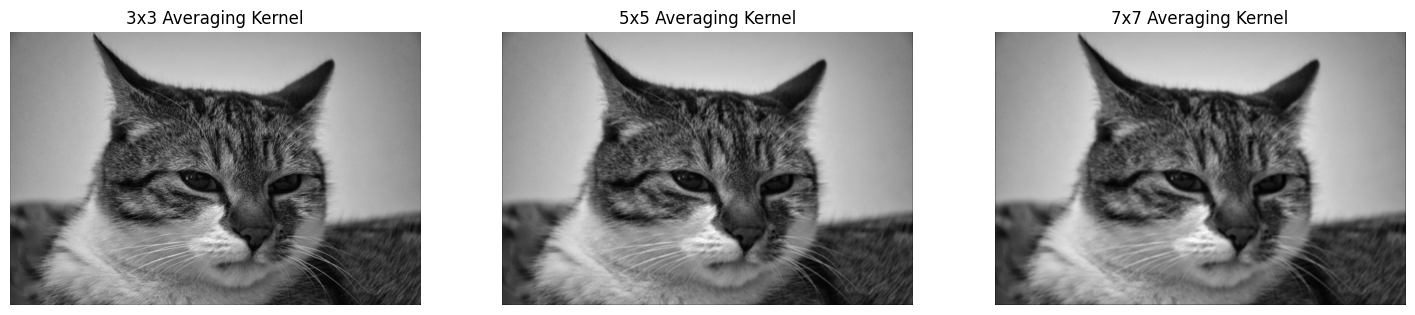

In [15]:
# Define larger averaging kernels
kernel_avg_3 = np.ones((3, 3)) / 9.0
kernel_avg_5 = np.ones((5, 5)) / 25.0
kernel_avg_7 = np.ones((7, 7)) / 49.0

# Apply the kernels with 'same' padding
output_avg_3 = convolve2d_manual(image, kernel_avg_3, stride=1, padding='same', mode='convolution')
output_avg_5 = convolve2d_manual(image, kernel_avg_5, stride=1, padding='same', mode='convolution')
output_avg_7 = convolve2d_manual(image, kernel_avg_7, stride=1, padding='same', mode='convolution')

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(output_avg_3, cmap='gray')
axs[0].set_title("3x3 Averaging Kernel")
axs[0].axis('off')
axs[1].imshow(output_avg_5, cmap='gray')
axs[1].set_title("5x5 Averaging Kernel")
axs[1].axis('off')
axs[2].imshow(output_avg_7, cmap='gray')
axs[2].set_title("7x7 Averaging Kernel")
axs[2].axis('off')
plt.show()


**Changing Stride**

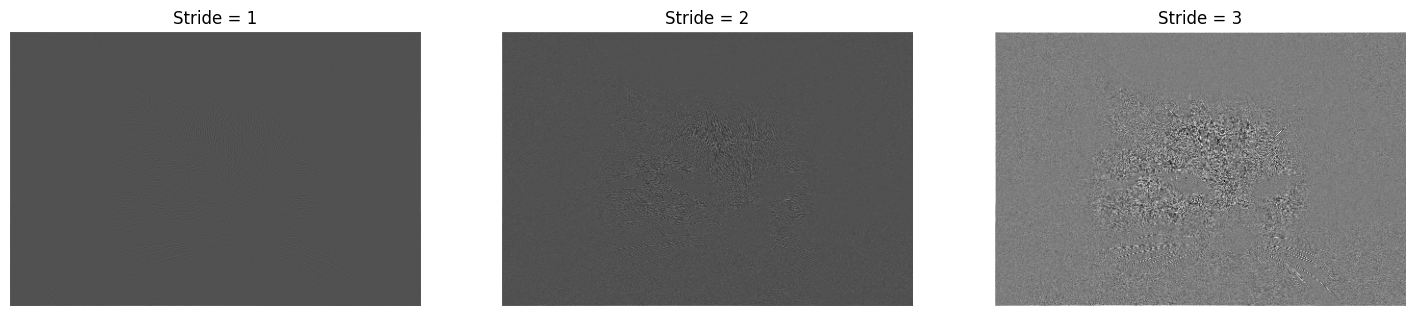

In [16]:
# Apply the edge detection kernel with different strides (note: 'same' padding might not exactly hold when stride > 1)
output_stride1 = convolve2d_manual(image, kernel_edge, stride=1, padding='same', mode='convolution')
output_stride2 = convolve2d_manual(image, kernel_edge, stride=2, padding='same', mode='convolution')
output_stride3 = convolve2d_manual(image, kernel_edge, stride=3, padding='same', mode='convolution')

# Visualize the outputs
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(output_stride1, cmap='gray')
axs[0].set_title("Stride = 1")
axs[0].axis('off')
axs[1].imshow(output_stride2, cmap='gray')
axs[1].set_title("Stride = 2")
axs[1].axis('off')
axs[2].imshow(output_stride3, cmap='gray')
axs[2].set_title("Stride = 3")
axs[2].axis('off')
plt.show()


Changing Padding

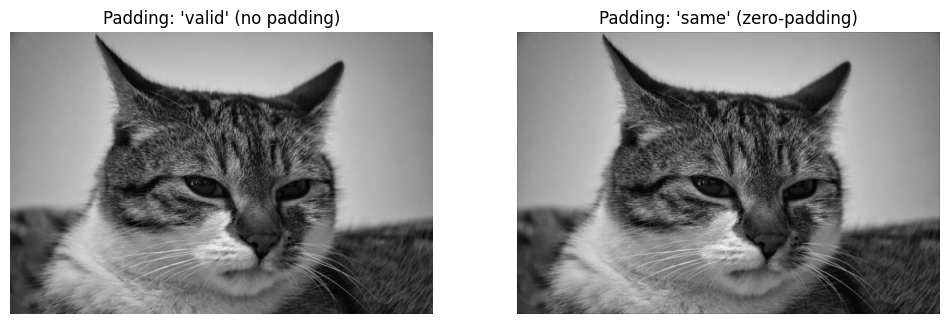

In [17]:
output_valid = convolve2d_manual(image, kernel_blur, stride=1, padding='valid', mode='convolution')
output_same = convolve2d_manual(image, kernel_blur, stride=1, padding='same', mode='convolution')

# Visualize the outputs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(output_valid, cmap='gray')
axs[0].set_title("Padding: 'valid' (no padding)")
axs[0].axis('off')
axs[1].imshow(output_same, cmap='gray')
axs[1].set_title("Padding: 'same' (zero-padding)")
axs[1].axis('off')
plt.show()


Multiple kernals


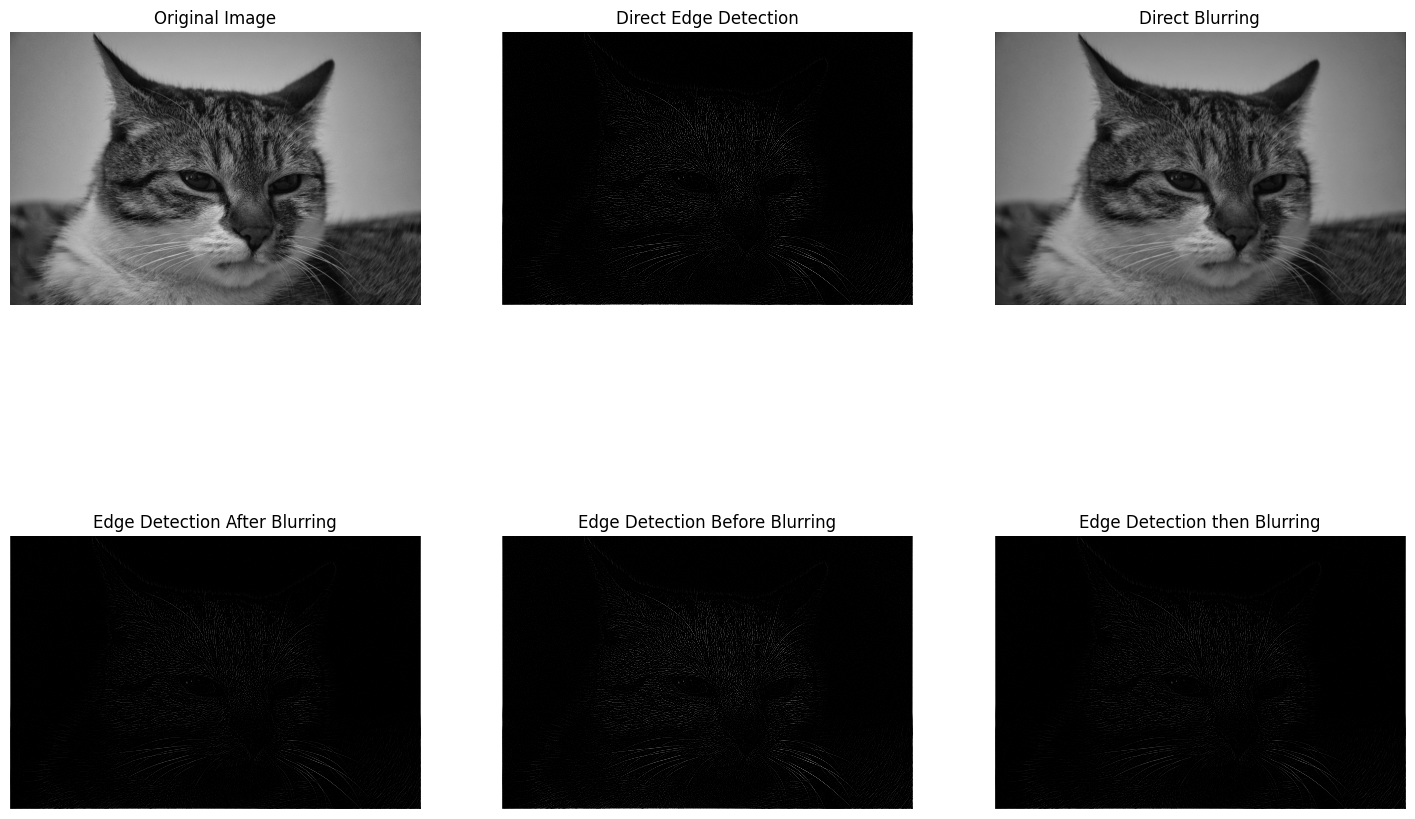

In [18]:
# 1. Edge detection directly on the original image.
edge_direct = convolve2d_manual(image, kernel_edge, stride=1, padding='same', mode='convolution')

# 2. Blurring directly on the original image.
blurred = convolve2d_manual(image, kernel_blur, stride=1, padding='same', mode='convolution')

# 3. Edge detection after blurring (apply blur first, then edge detection).
edge_after_blur = convolve2d_manual(blurred, kernel_edge, stride=1, padding='same', mode='convolution')

# 4. Edge detection before blurring (apply edge detection first, then blur).
edge_first = convolve2d_manual(image, kernel_edge, stride=1, padding='same', mode='convolution')
edge_then_blur = convolve2d_manual(edge_first, kernel_blur, stride=1, padding='same', mode='convolution')

# Plot the results for comparison
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(edge_direct, cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_title("Direct Edge Detection")
axs[0, 1].axis('off')

axs[0, 2].imshow(blurred, cmap='gray', vmin=0, vmax=255)
axs[0, 2].set_title("Direct Blurring")
axs[0, 2].axis('off')

axs[1, 0].imshow(edge_after_blur, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title("Edge Detection After Blurring")
axs[1, 0].axis('off')

axs[1, 1].imshow(edge_first, cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_title("Edge Detection Before Blurring")
axs[1, 1].axis('off')

axs[1, 2].imshow(edge_then_blur, cmap='gray', vmin=0, vmax=255)
axs[1, 2].set_title("Edge Detection then Blurring")
axs[1, 2].axis('off')

plt.show()